In [1]:
import calendar
import math
from river import compose
from river import linear_model
from river import optim
from river import preprocessing
from river import time_series
from sklearn.model_selection import train_test_split
import pandas as pd
from river import neighbors

from river import metrics


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'consumption' is your target variable
df = pd.read_csv('wheaterVersion.csv')

,datetime,Customer,Generator Capacity,Postcode,Consumption Category,temperature_2m,precipitation,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,is_day,sunshine_duration,Month,DayOfWeek,consumption
0,2010-07-01,201,1.75,2291,GG,24.0,0.0,35.1,12.0,0.0,81.0,1.0,3600.0,7,3,0.0
1,2010-07-01,36,1.00,2137,GG,24.0,0.0,35.1,12.0,0.0,81.0,1.0,3600.0,7,3,0.0
4,2010-07-01,35,2.10,2284,GG,24.0,0.0,35.1,12.0,0.0,81.0,1.0,3600.0,7,3,0.0
7,2010-07-01,34,1.00,2082,GG,24.0,0.0,35.1,12.0,0.0,81.0,1.0,3600.0,7,3,0.0
9,2010-07-01,33,2.10,2303,GG,24.0,0.0,35.1,12.0,0.0,81.0,1.0,3600.0,7,3,0.0


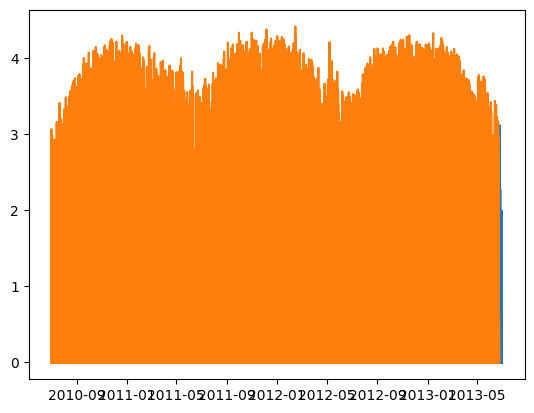

In [3]:

df['datetime'] = pd.to_datetime(df['datetime'])

# Filter the DataFrame to only include rows where 'Consumption Category' is 'GG'
df = df[df['Consumption Category'] == 'GG']

#only keep full hours
df = df[df['datetime'].dt.minute == 0]

# Continue with the rest of your code
start_date = df["datetime"].min()
end_date = df['datetime'].max()

X = df.drop('consumption', axis=1)
y = df['consumption']

# Get month and day of the week from the date time column
X['Month'] = X['datetime'].dt.month
X['DayOfWeek'] = X['datetime'].dt.dayofweek

X_train = X
y_train = y

# Convert the training set back to DataFrame for the model training
train_df = pd.concat([X_train, y_train], axis=1)

#remove one week from the end of the training set to use as test set
test_df = train_df[train_df['datetime'] >= end_date - pd.Timedelta(days=7)]
train_df = train_df[train_df['datetime'] < end_date - pd.Timedelta(days=7)]
test_df.head()

#plot the test set
plt.plot(test_df['datetime'], test_df['consumption'])
test_df.head()

#plot the training set
plt.plot(train_df['datetime'], train_df['consumption'])
train_df.head()

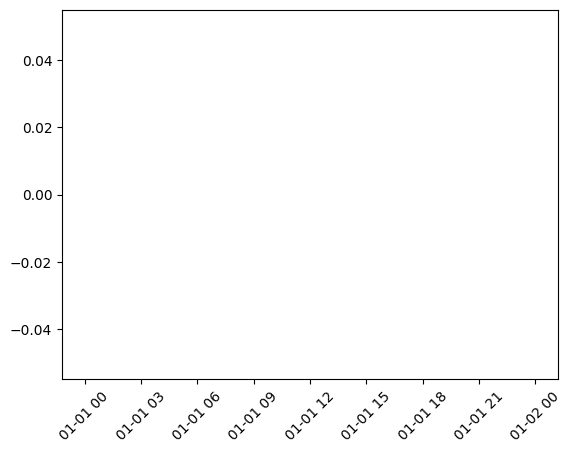

In [4]:
# Plot the last week of data
last_week = train_df[train_df['datetime'] > end_date - pd.Timedelta(days=7)]
plt.plot(last_week['datetime'],last_week['consumption'])
#rotate x-axis labels
plt.xticks(rotation=45)
plt.show()

In [5]:
# Get unique customers
unique_customers = df['Customer'].unique()

# Calculate the number of rows needed for subplots
n = len(unique_customers)
rows = n // 2
rows += n % 2

# Create subplots
fig, axes = plt.subplots(rows, 2, figsize=(14, rows*4))

# Flatten the axes array
axes = axes.flatten()

# Plot consumption for each customer
for ax, customer in zip(axes, unique_customers):
    customer_data = train_df[train_df['Customer'] == customer]
    last_week = customer_data[customer_data['datetime'] > end_date - pd.Timedelta(days=7)]
    ax.plot(last_week['datetime'], last_week['consumption'], label=f'Customer {customer}')
    ax.legend()

# Remove unused subplots
if len(unique_customers) < len(axes):
    for ax in axes[len(unique_customers):]:
        fig.delaxes(ax)

plt.tight_layout()
plt.show()




KeyboardInterrupt: 

In [5]:
#creat a subset only for customer 36
customer_36 = train_df[train_df['Customer'] == 36]
print(customer_36.head())

#only keep datetime month, day of the week and consumption columns
customer_36 = customer_36[['datetime', 'Month', 'DayOfWeek', 'consumption','temperature_2m','precipitation','cloud_cover','sunshine_duration','cloud_cover_low','cloud_cover_mid','cloud_cover_high']]

test_customer_36 = test_df[test_df['Customer'] == 36]


customer_36.head()

                datetime  Customer  Generator Capacity  Postcode  \
1    2010-07-01 00:00:00        36                 1.0      2137   
1151 2010-07-01 01:00:00        36                 1.0      2137   
1607 2010-07-01 02:00:00        36                 1.0      2137   
2257 2010-07-01 03:00:00        36                 1.0      2137   
3058 2010-07-01 04:00:00        36                 1.0      2137   

     Consumption Category  temperature_2m  precipitation  cloud_cover  \
1                      GG           24.00            0.0         35.1   
1151                   GG           24.10            0.0         53.7   
1607                   GG           24.20            0.0         42.9   
2257                   GG           24.25            0.0         36.6   
3058                   GG           24.30            0.0         27.3   

      cloud_cover_low  cloud_cover_mid  cloud_cover_high  is_day  \
1                12.0              0.0              81.0     1.0   
1151            

,datetime,Month,DayOfWeek,consumption,temperature_2m,precipitation,cloud_cover,sunshine_duration,cloud_cover_low,cloud_cover_mid,cloud_cover_high
1,2010-07-01 00:00:00,7,3,0.0,24.00,0.0,35.1,3600.0,12.0,0.0,81.0
1151,2010-07-01 01:00:00,7,3,0.0,24.10,0.0,53.7,3600.0,32.0,0.0,83.0
1607,2010-07-01 02:00:00,7,3,0.0,24.20,0.0,42.9,3600.0,22.0,0.0,77.0
2257,2010-07-01 03:00:00,7,3,0.0,24.25,0.0,36.6,3600.0,16.0,0.0,74.0
3058,2010-07-01 04:00:00,7,3,0.0,24.30,0.0,27.3,3600.0,8.0,0.0,67.0


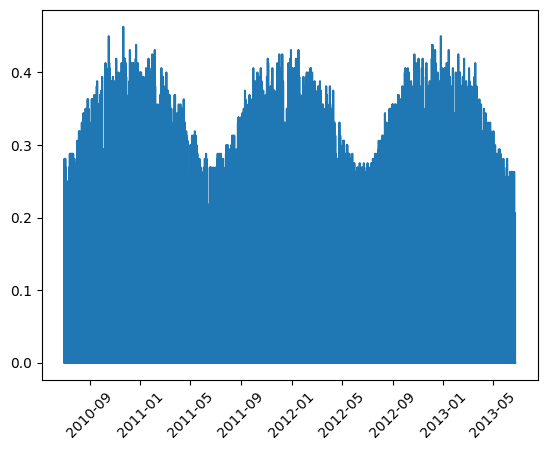

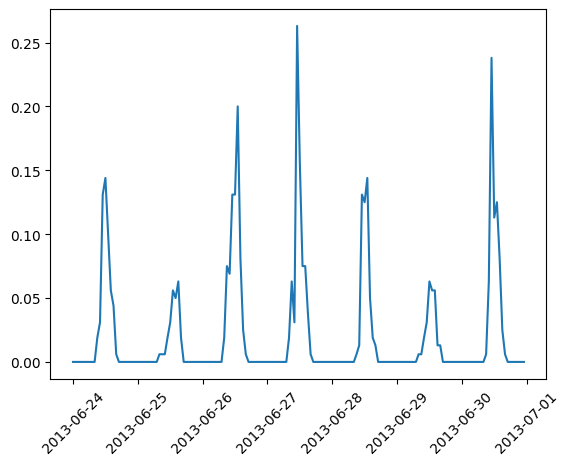

26135
169


In [11]:
#plot the consumption for customer 36
plt.plot(customer_36['datetime'], customer_36['consumption'])
plt.xticks(rotation=45)
plt.show()

#plot one week of data
last_week = test_customer_36[test_customer_36['datetime'] > end_date - pd.Timedelta(days=7)]
plt.plot(last_week['datetime'], last_week['consumption'])
plt.xticks(rotation=45)
plt.show()

#print the legth of the training and test set
print(len(customer_36))
print(len(test_customer_36))






In [11]:

model= (
    preprocessing.StandardScaler() |
    time_series.SNARIMAX(
        p=1,
        d=0,
        q=1,
        
        sp=0,
        sd=1,
        sq=1,
        m=24,
        regressor=(
            preprocessing.StandardScaler() |
            neighbors.KNNRegressor(
            n_neighbors=12,
            aggregation_method = 'weighted_mean',
        )
        )
    )
)

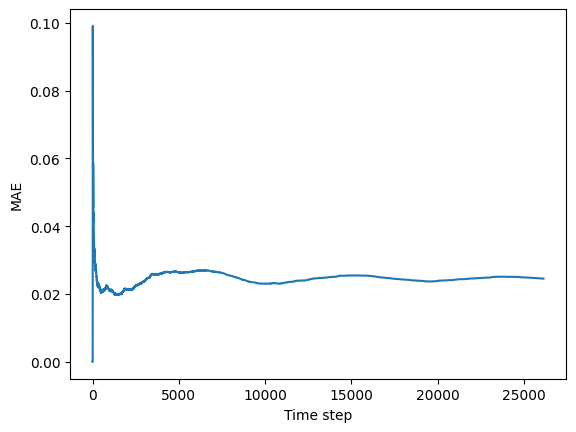

One-step-ahead final MAE: 0.024556656484882658
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.031, 0.2245, -0.13758499999999996, 0.2769409790688579, 0.14402613811020842, 0.12909270367604017, 0.08621612795712205, 0.018515237299623413, 0.0310515904133735, 0.011364514794599198, 0.010913611848205398, 0.009636811481941456, 0.008655923906986975, 0.007755292283622161, 0.006951008697614728, 0.006223727421210377, 0.005563680706592432, 0.004961896542701304, 0.00441118877847195, 0.003905543947226184, 0.003439916388373189, 0.0030100265615613797, 0.002612216178070576, 0.0022433343057625885, 0.007900648548206496, 0.07571657894608703, 0.18264034478683006, 0.2547179742023543, 0.23113307976143121, 0.1946984964099827, 0.1220618084546491, 0.04287430773073937, -0.01290344769378128, -0.018576652716342845, -0.014113019608201388, -0.014956631675519146, -0.013958838046424386, -0.01368241347330364, -0

In [14]:
# Initialize the MAE metric

model= (
    time_series.SNARIMAX(
        p=1,
        d=0,
        q=1,
        sp=1,
        sd=1,
        sq=1,
        m=24,
    )
)
mae = metrics.MAE()
list_of_predictions = []
mae_values = []  # List to store MAE values over time
for i, (_, row) in enumerate(customer_36.iterrows()):
    y = row['consumption']
    
    if i > 0:  # Skip the first observation
        forecast = model.forecast(horizon=1)  # forecast 1 step ahead
        list_of_predictions.append(forecast[0])
        mae.update(y, forecast[0])
        mae_values.append(mae.get())  # Store the current MAE
    model.learn_one(y)

# Plot MAE over time
plt.plot(mae_values)
plt.xlabel('Time step')
plt.ylabel('MAE')
plt.show()

print(f"One-step-ahead final MAE: {mae.get()}")
#print list of predictions
print(list_of_predictions)
print(list_of_predictions)


In [12]:
import matplotlib.pyplot as plt

mae = metrics.MAE()

# Train the model
list_of_predictions = []
mae_values = []  # List to store MAE values over time
for i, (_, row) in enumerate(customer_36.iterrows()):
    y = row['consumption']
    
    exog = row.drop('consumption').drop("datetime").to_dict()
    if i%1000 == 0:
        print(exog)
    
    if i > 0:  # Skip the first observation
        forecast = model.forecast(horizon=1, xs=[exog])  # forecast 1 step ahead
        list_of_predictions.append(forecast[0])
        mae.update(y, forecast[0])
        mae_values.append(mae.get())  # Store the current MAE
    model.learn_one(exog, y)

# Plot MAE over time
plt.plot(mae_values)
plt.xlabel('Time step')
plt.ylabel('MAE')
plt.show()

print(f"One-step-ahead final MAE: {mae.get()}")
#print list of predictions
print(list_of_predictions)

{'Month': 7, 'DayOfWeek': 3, 'temperature_2m': 24.0, 'precipitation': 0.0, 'cloud_cover': 35.1, 'sunshine_duration': 3600.0, 'cloud_cover_low': 12.0, 'cloud_cover_mid': 0.0, 'cloud_cover_high': 81.0}
{'Month': 8, 'DayOfWeek': 2, 'temperature_2m': 26.1, 'precipitation': 0.3, 'cloud_cover': 40.800003, 'sunshine_duration': 0.0, 'cloud_cover_low': 21.0, 'cloud_cover_mid': 13.0, 'cloud_cover_high': 47.0}
{'Month': 9, 'DayOfWeek': 2, 'temperature_2m': 27.7, 'precipitation': 0.0, 'cloud_cover': 42.0, 'sunshine_duration': 174.12436, 'cloud_cover_low': 45.0, 'cloud_cover_mid': 0.0, 'cloud_cover_high': 5.0}
{'Month': 11, 'DayOfWeek': 2, 'temperature_2m': 23.9, 'precipitation': 0.0, 'cloud_cover': 74.399994, 'sunshine_duration': 3600.0, 'cloud_cover_low': 72.0, 'cloud_cover_mid': 0.0, 'cloud_cover_high': 32.0}
{'Month': 12, 'DayOfWeek': 1, 'temperature_2m': 21.2, 'precipitation': 0.9, 'cloud_cover': 100.0, 'sunshine_duration': 0.0, 'cloud_cover_low': 99.0, 'cloud_cover_mid': 100.0, 'cloud_cover_h

26134
26134


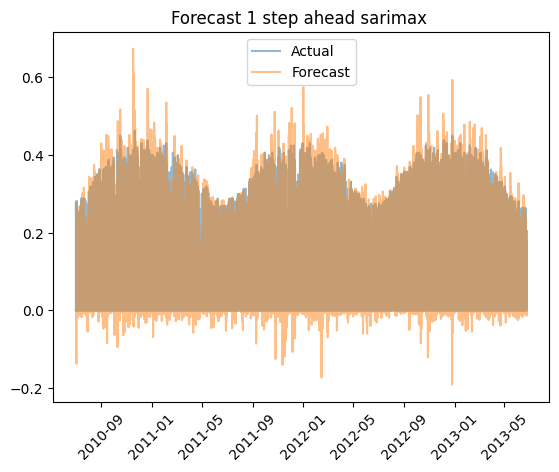

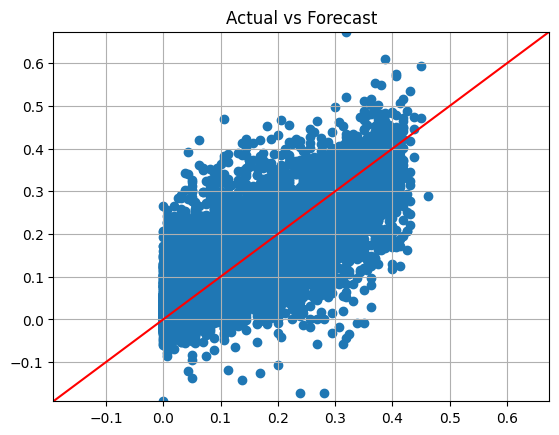

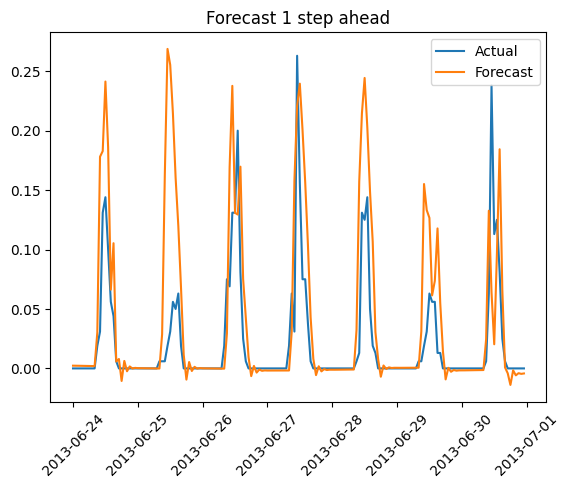

In [15]:
#get length of the forecast
print(len(list_of_predictions))

#get length of the actual consumption
print(len(customer_36['consumption'].iloc[1:]))

# 
# plot the forecast
plt.plot(customer_36['datetime'], customer_36['consumption'],alpha=0.5, label='Actual')
plt.plot(customer_36['datetime'].iloc[1:], list_of_predictions,alpha=0.5 , label='Forecast')
plt.xticks(rotation=45)
#set ylim

plt.legend()
#title
plt.title('Forecast 1 step ahead sarimax ')
plt.show()

# Scatter plot of actual vs forecast
plt.scatter(customer_36['consumption'].iloc[1:], list_of_predictions)
#set title
plt.title('Actual vs Forecast')
# Get the limits for x and y axes
lower_limit = min(min(customer_36['consumption'].iloc[1:]), min(list_of_predictions))
upper_limit = max(max(customer_36['consumption'].iloc[1:]), max(list_of_predictions))

# Set the same scale for both x and y axes
plt.xlim(lower_limit, upper_limit)
plt.ylim(lower_limit, upper_limit)

# Draw a 45-degree line
plt.plot([lower_limit, upper_limit], [lower_limit, upper_limit], 'r')

# Add a grid
plt.grid(True)

plt.show()



#plot one week of data
last_week = test_customer_36[test_customer_36['datetime'] > end_date - pd.Timedelta(days=7)]
plt.plot(last_week['datetime'], last_week['consumption'], label='Actual')
plt.plot(last_week['datetime'], list_of_predictions[-168:], label='Forecast')
#add title
plt.title('Forecast 1 step ahead')

plt.xticks(rotation=45)
plt.legend()
plt.show()


C:\Users\Stijn\AppData\Local\Temp\ipykernel_20788\1648209129.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.plot(pd.date_range(start=train_df['datetime'].max(), periods=24*7, freq='H'), forecast,alpha=0.5 , label='Forecast')


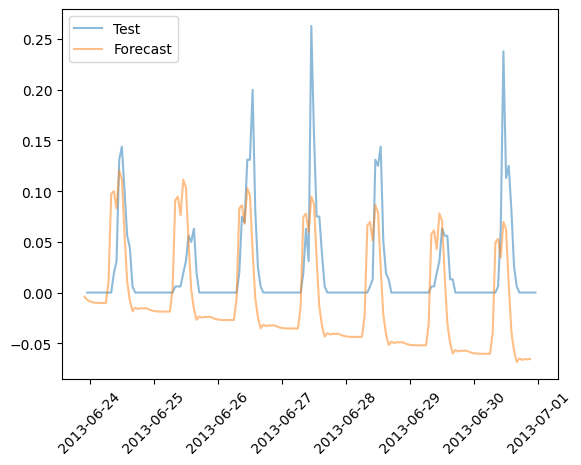

In [17]:
#forecast a week ahead
forecast = model.forecast(horizon=24*7)
#plot the forecast
#plt.plot(customer_36['datetime'], customer_36['consumption'],alpha=0.5, label='Actual')
plt.plot(test_customer_36['datetime'], test_customer_36['consumption'],alpha=0.5, label='Actual')
plt.plot(pd.date_range(start=train_df['datetime'].max(), periods=24*7, freq='H'), forecast,alpha=0.5 , label='Forecast')
#add test set 

plt.xticks(rotation=45)
plt.legend()
 